# Data Challenge 6

github link: https://github.com/kelseyaguirre/Data_Challenge_6

In [114]:
# code to show/hide python code in a report
from IPython.display import HTML
HTML('''
<script src='//code.jquery.com/jquery-3.3.1.min.js'></script>
<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
$('div .jp-CodeCell .jp-Cell-inputWrapper').hide();
} else {
$('div.input').show();
$('div .jp-CodeCell .jp-Cell-inputWrapper').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Code on/off"></form>''')

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [35]:
#define the style like in lecture
plt.style.use('classic')
#I picked Amsterdam, The Netherlands as my city
#read in the listings file
listings =  pd.read_csv('Documents/Data_Science_I/Week_12/Data_Challenge_6/listings.csv.gz')

In [96]:
#picked what I want as my factors
listings_2 = listings.filter(items=['price', 'review_scores_rating', 'number_of_reviews', 'availability_365'])
#drop the nas to clean it up
listings_2 = listings_2.dropna()
#get rid of dollar sign for price
#need to get rid of the strings to scale
listings_2['price'] = listings_2['price'].str.replace('$', '')
listings_2['price'] = listings_2['price'].str.replace(',', '')
#turn into float
listings_2['price'].astype('float')
#keep first 1000 rows because I was struggling with the clustering later on
listings_2 = listings_2[:1000]

In [98]:
#Scale for the PCA, because it helps the calculations
#initalize scaler to be standard scaler
scaler = StandardScaler()
#calculates the mean and the std dev for rows and the columns
scaler.fit(listings_2)
#subtracts out the mean and divides by the sd
data_scaled = scaler.transform(listings_2)

In [113]:
#Perform PCA
#initalize the PCA
pca = PCA()
#fit it to newly scaled data
pca.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## Figure 1

Text(0.5, 1.0, 'Figure 1: Scree Plot')

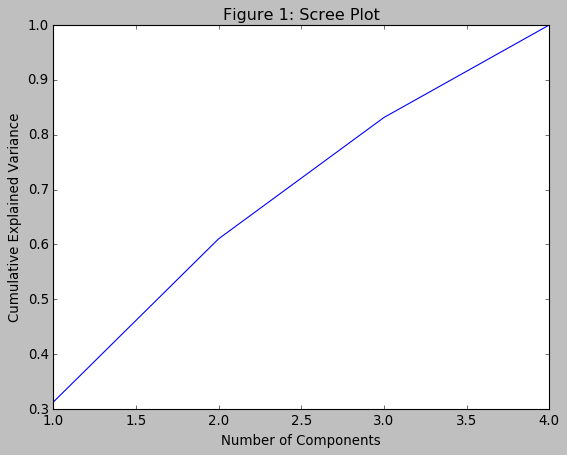

In [100]:
#scree plot
#define all 4 columns as components
components = np.arange(1,5)
#plot the scree plot of components vs cumulative explained variance ratio
plt.plot(components, np.cumsum(pca.explained_variance_ratio_))
#label the x axis
plt.xlabel('Number of Components')
#label the y axis
plt.ylabel('Cumulative Explained Variance')
#label the title
plt.title("Figure 1: Scree Plot")

In [102]:
#dimension reduction with PCA
#chose 3 because it represents 80% of my variance
pca = PCA(n_components=3) 
#fit it to the scaled data
pca.fit(data_scaled)

#if we project three data points, on this direction the projected values are the principal component scores
#define the scores
pca_scores = pca.fit_transform(data_scaled)

## Figure 2

Text(0.5, 1.0, 'Figure 2: First vs Second PC')

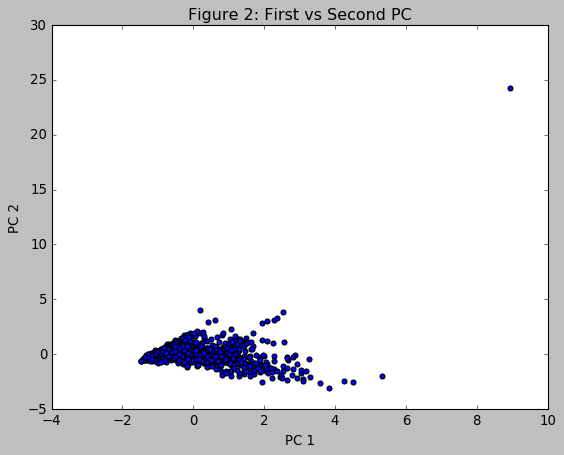

In [103]:
#initialize the label encoder
LE = LabelEncoder()
#plot a scatter plot with PCs 1 and 2
plt.scatter(pca_scores[:,0], pca_scores[:,1])
#label the x and y axis
plt.xlabel('PC 1')
plt.ylabel('PC 2')
#add in the title
plt.title("Figure 2: First vs Second PC")

## Figure 3

Text(0.5, 1.0, 'First vs Third PC')

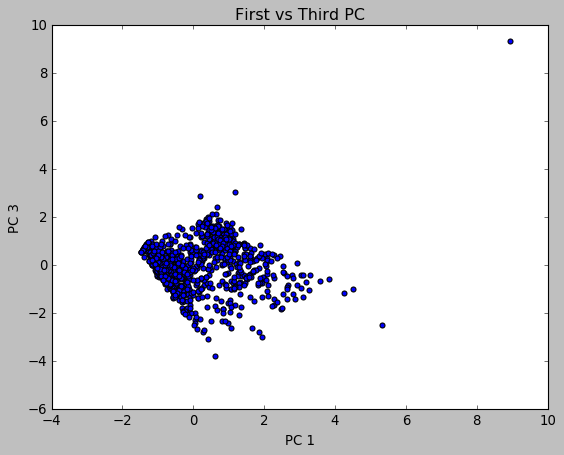

In [104]:
#initialize the label encoder
LE = LabelEncoder()
#plot a scatter plot with PCs 1 and 2
plt.scatter(pca_scores[:,0], pca_scores[:,2])
#label the x and y axis
plt.xlabel('PC 1')
plt.ylabel('PC 3')
#add in the title
plt.title("First vs Third PC")

## Figure 4

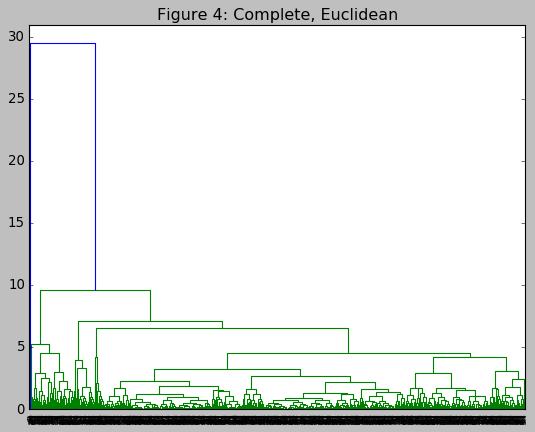

In [109]:
#apply hierarchical clustering
#plot this dendrogram with complete linkage display
dend_3 = shc.dendrogram(shc.linkage(pca_scores, metric = 'Euclidean', method = 'complete'))
#_ supresses the output
#label the title
_ = plt.title("Figure 4: Complete, Euclidean")

## Figure 5

In [111]:
#cluster the observations into four groups based off a cut just above 5 on the dendrogram
#keep using complete linkage
cluster = AgglomerativeClustering(n_clusters = 4,
                                 affinity = 'euclidean',
                                 linkage = 'complete')
#define the prediction for the crosstab
prediction = cluster.fit_predict(pca_scores)
#show the table that displays the clusters and predictions established
#compare the 4 clusters to the ratings
pd.crosstab(prediction, listings_2['review_scores_rating'])

review_scores_rating,72.0,77.0,80.0,81.0,83.0,84.0,85.0,86.0,87.0,88.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
row_0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,2,1,3,...,25,33,58,60,97,137,129,128,73,94
1,0,2,4,1,2,4,6,3,11,4,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,2,0,4,...,9,6,9,12,10,9,10,6,4,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Abstract

I used the Amsterdam, North Holland, in The Netherlands detailed listings CSV file from AirBnB as my data. From that I narrowed my features down to price, the score they recived from the review, the number of reviews for each listing, and the year-round availability. After using Principal Component Analysis as my tool for unsupervised learning, I was able to establish a dimension reduction which allowed me to further categorize my results. Unsupervised learning has been a difficult concept for me to grasp and apply, but from this assignment I've been able to practice and apply these tools to see categories in such a massive dataset. My figures show that once these four factors are scaled I can extract clear clusters and that most of my higher ratings AirBnBs tend to cluster together drastically. 

## Introduction

For our last data challenge we were directed to use one of the detailed CSV files from http://insideairbnb.com/get-the-data.html. I decided to choose Amsterdam in the Netherlands as I'm intersted in moving there for graduate school. After choosing my city the next decision I needed to make was to pick factors within the file that I could group together to tell a useful story. Utilizing PCA as a tool for unsupervised learning I compared factors until I found a few that gave me a defined elbow in my scree plot. After continuing with my data I found it challenging to cluster so many rows of data so I decided to narrow down my dataset inorder to properly plot my pca scores and further clustering.

## Methods

After playing around with many features here in the Amsterdam Air BnBs listings file, I settled on four features that I originally assumed would correlate with eachother. My assumption was confirmed by two clear elbows in figure 1, the scree plot. Then, I chose three PCAs because you can see on my scree plot (fig. 1) that there is an elbow at 3 PCAs, representing about 80% of the variance within these four factors. I went on to compare my three PCs in two different plots, figures 2 and 3.

For my clustering analysis I went with complete linkage because you can see more inter-cluster dissimilarity, due to the nature of the calculations. Complete is always the most dissimilar because its displaying the largest of the pairwise dissimilarities between chosen variables. I found this to better suite the data than average linkage and single linkage which show the average and the smallest of this pairwise dissimilarities calculation. I also chose euclidean distance, as it is the default and what we have been primarily using in this course. These paramaters are displayed in figures 4 and 5.

## Results

My results are difficult to interpret, but display a clear correlation between my four chosen factors. In figure 1, the scree plot you can see that there are two elbows, I went with the one at 3 PCAs since it is representing about 80% of the variance within these four factors. When comparing my PC results, you can see that figure 3 is a better comparison than figure 2 since when plotting PC 1 to PC 3, the data is more spaced out than when comparing PC 1 to PC 2.

Next in figure, figure 4, I used a dendrogram to show clustering, you can see that at just above 5 on the y axis there are about 4 defined clusters. I used that data to further cluster in figure 5. From figure 5 you can see that most of my higher ratings AirBnBs tend to cluster together drastically, in cluster number 1. This is a result I wouldn't have been able to see without the tools of unsupervised learning.

## Discussion

From class and the reading, Principal Component Analysis is an amazing tool that finds a low-dimensional representation of a data set that contains as much as possible of the variation. This is possible because PCs provide low-dimensional linear surfaces that are closest to the observations. Here I used PCA is a tool for exploratory data analysis and then used two different forms of clustering to further group and analyze my results.